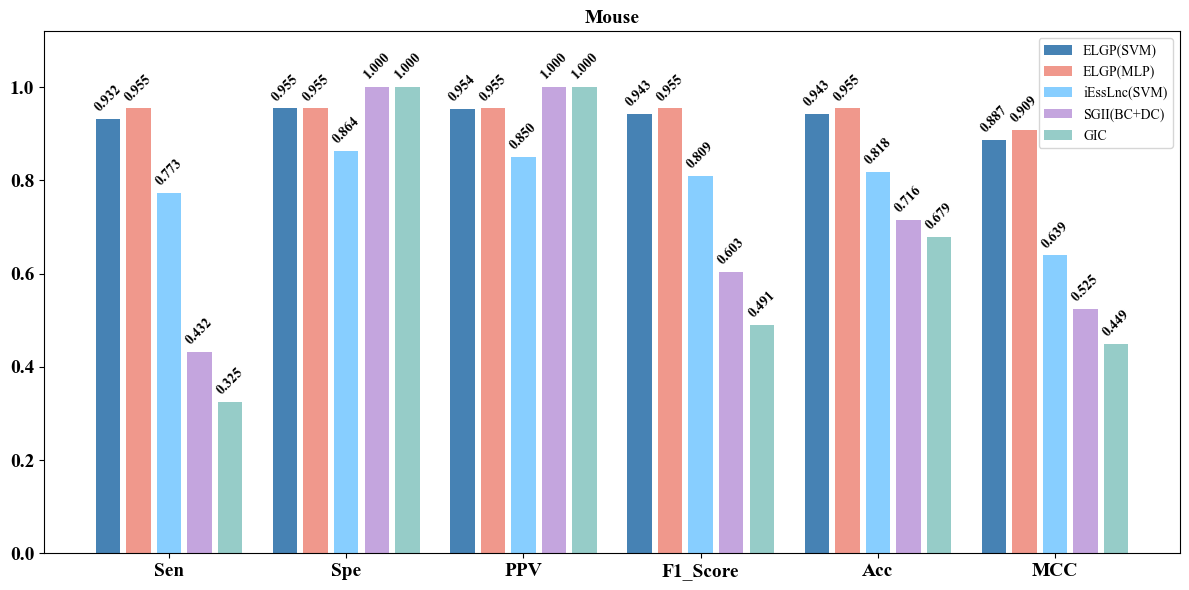

In [ ]:
# Mouse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# Set the font style
rcParams['font.family'] = 'Times New Roman'

# Load the data
df = pd.read_csv('mouse_compare_metrics.csv')
df.set_index('Model', inplace=True)

models = df.index.tolist()
metrics = df.columns.tolist()
num_models = len(models)
num_metrics = len(metrics)

# Configuration settings
bar_width = 0.1
spacing = 0.025
group_width = num_models * (bar_width + spacing) + 0.1
x = np.arange(0, num_metrics * group_width, group_width)

colors = ['#F4E1E0', '#E0F1F5', '#87CEFF', '#C4A5DE', '#96CCC8']

plt.figure(figsize=(12, 6))

for i, model in enumerate(models):
    bar_positions = x + i * (bar_width + spacing)
    values = df.loc[model].values
    bars = plt.bar(bar_positions, values, width=bar_width,
                   color=colors[i % len(colors)], label=model)

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, height + 0.01,
            f'{height:.3f}',
            ha='center', va='bottom',
            fontsize=10,
            fontweight='bold',
            rotation=45
        )

# Set the chart labels
plt.legend(prop={'weight': 'bold', 'size': 8})
plt.title('Mouse', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold', fontsize=14)
plt.ylim(0, 1.12)
plt.xticks(x + ((num_models - 1) / 2) * (bar_width + spacing), metrics, fontweight='bold', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig("mouse/mouse_compare.svg")
plt.show()


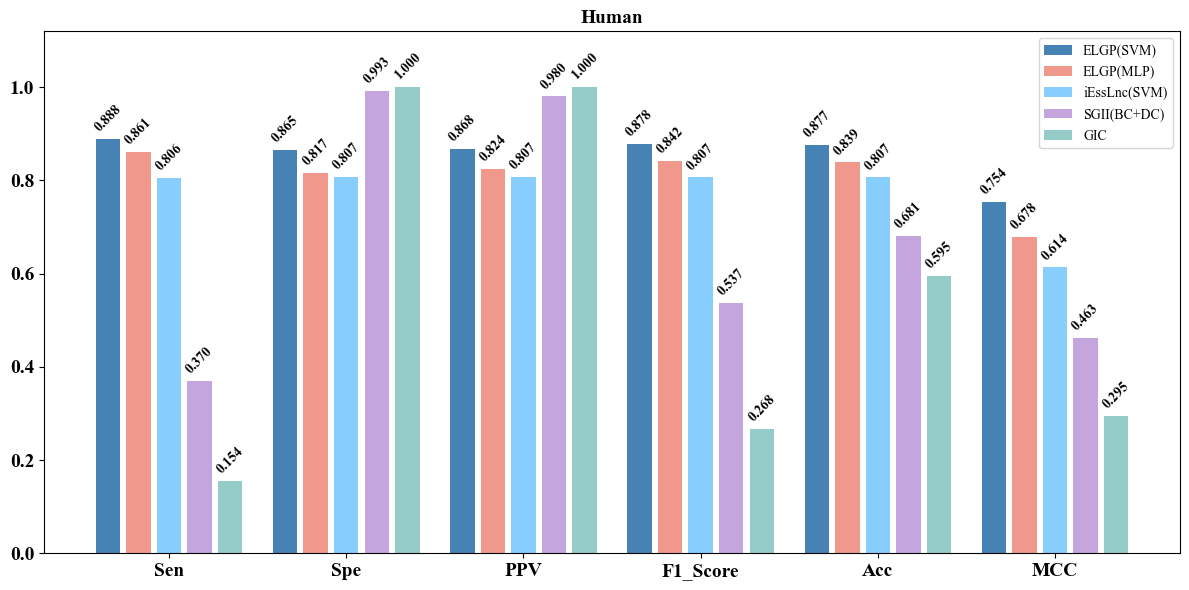

In [4]:
# Human
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# Set the font style
rcParams['font.family'] = 'Times New Roman'

# Load the data
df = pd.read_csv('human_compare_metrics.csv')
df.set_index('Model', inplace=True)

models = df.index.tolist()
metrics = df.columns.tolist()
num_models = len(models)
num_metrics = len(metrics)

# Configuration settings
bar_width = 0.1
spacing = 0.025
group_width = num_models * (bar_width + spacing) + 0.1
x = np.arange(0, num_metrics * group_width, group_width)

colors = ['#4682B4', '#F0988C', '#87CEFF', '#C4A5DE', '#96CCC8']

plt.figure(figsize=(12, 6))

for i, model in enumerate(models):
    bar_positions = x + i * (bar_width + spacing)
    values = df.loc[model].values
    bars = plt.bar(bar_positions, values, width=bar_width,
                   color=colors[i % len(colors)], label=model)

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, height + 0.01,
            f'{height:.3f}',
            ha='center', va='bottom',
            fontsize=10,
            fontweight='bold',
            rotation=45
        )

# Set the chart labels
plt.legend(prop={'weight': 'bold', 'size': 8})
plt.title('Human', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold', fontsize=14)
plt.ylim(0, 1.12)
plt.xticks(x + ((num_models - 1) / 2) * (bar_width + spacing), metrics, fontweight='bold', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig("human/human_compare.svg")
plt.show()


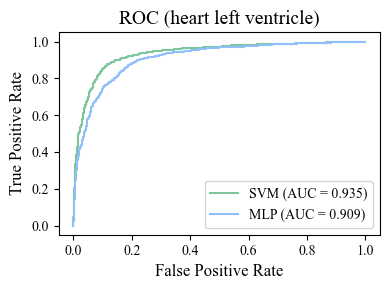

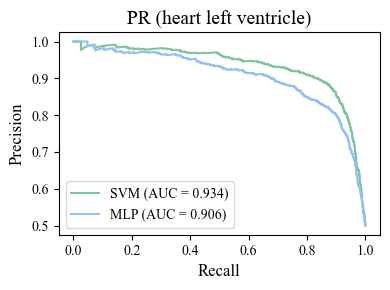

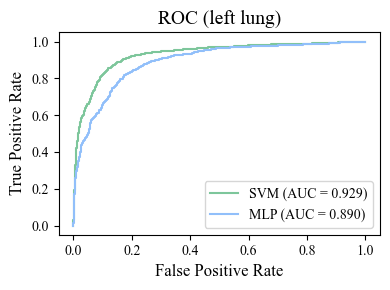

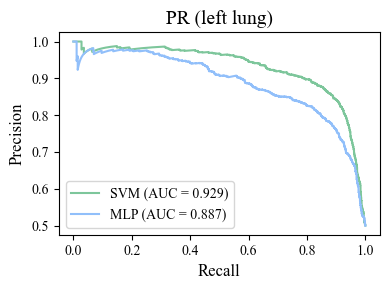

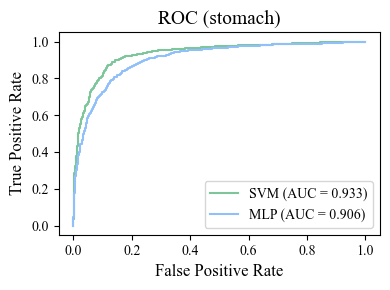

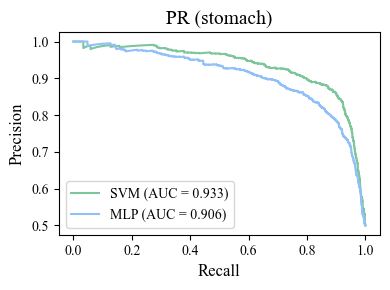

In [9]:
# Mouse
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import os
from matplotlib import rcParams

# Set the font style
rcParams['font.family'] = 'Times New Roman'

# Set the directory where your CSV files are located
input_folder = '../../classifier/'

if __name__ == "__main__":

    model_names = ['SVM', 'MLP']
    species = 'human'
    
    # Define a color map for different models
    model_colors = {
        'SVM': '#7DC69B',
        'MLP': '#91BFFA'
    }

    tissues = {
        'heart': 'heart left ventricle',
        'lung': 'left lung',
        'stomach': 'stomach'
    }

    for tissue, tissue_name in tissues.items():
        
        # Plot ROC AUC comparison curve
        plt.figure(figsize=(4,3))
        for model_name in model_names:
            roc_file_path = os.path.join(input_folder, f'{model_name}/performance/{species}/curve/roc_curve_{tissue}.csv')
            roc_data = pd.read_csv(roc_file_path)
            fpr = roc_data['FPR']
            tpr = roc_data['TPR']
            roc_auc = auc(fpr, tpr)
            # Use the color from model_colors dictionary
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})', color=model_colors.get(model_name))

        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title(f'ROC ({tissue_name})', fontsize=14)
        plt.legend(loc='lower right', frameon=True, fontsize=10)
        plt.tight_layout()
        plt.savefig(f'{species}/{tissue}_ROC.svg')
        plt.show()

        # Plot Precision-Recall AUC comparison curve
        plt.figure(figsize=(4,3))
        for model_name in model_names:
            pr_file_path = os.path.join(input_folder, f'{model_name}/performance/{species}/curve/pr_curve_{tissue}.csv')
            pr_data = pd.read_csv(pr_file_path)
            recall = pr_data['Recall']
            precision = pr_data['Precision']
            pr_auc = auc(recall, precision)
            # Use the color from model_colors dictionary
            plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.3f})', color=model_colors.get(model_name))

        plt.xlabel('Recall', fontsize=12)
        plt.ylabel('Precision', fontsize=12)
        plt.title(f'PR ({tissue_name})', fontsize=14)
        plt.legend(loc='lower left', frameon=True, fontsize=10)
        plt.tight_layout()
        plt.savefig(f'{species}/{tissue}_PR.svg')
        plt.show()


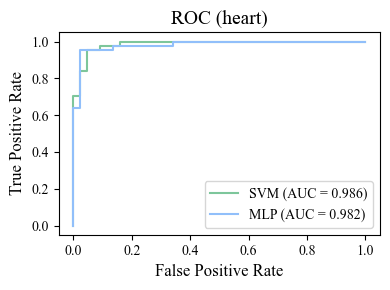

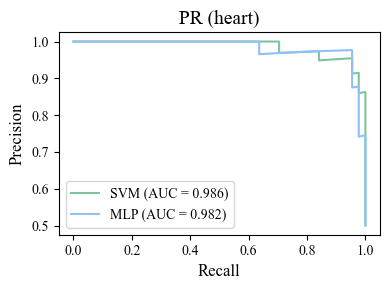

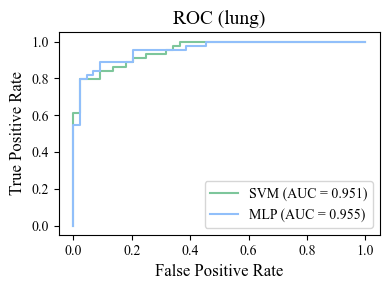

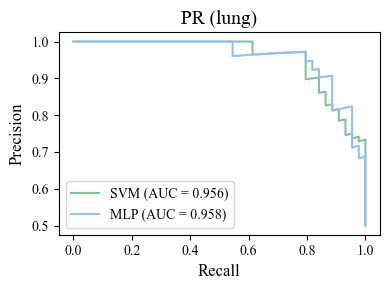

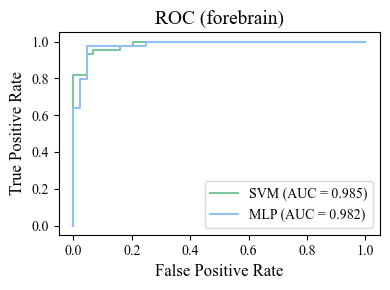

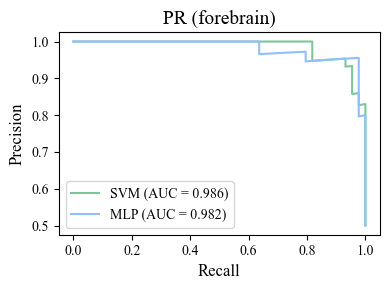

In [10]:
# Human
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import os
from matplotlib import rcParams

# Set the font style
rcParams['font.family'] = 'Times New Roman'

# Set the directory where your CSV files are located
input_folder = '../../classifier/'

if __name__ == "__main__":

    model_names = ['SVM', 'MLP']
    species = 'mouse'
    
    # Define a color map for different models
    model_colors = {
        'SVM': '#7DC69B',
        'MLP': '#91BFFA'
    }

    tissues = {
        'heart': 'heart',
        'lung': 'lung',
        'brain': 'forebrain'
    }

    for tissue, tissue_name in tissues.items():
        
        # Plot ROC AUC comparison curve
        plt.figure(figsize=(4,3))
        for model_name in model_names:
            roc_file_path = os.path.join(input_folder, f'{model_name}/performance/{species}/curve/roc_curve_{tissue}.csv')
            roc_data = pd.read_csv(roc_file_path)
            fpr = roc_data['FPR']
            tpr = roc_data['TPR']
            roc_auc = auc(fpr, tpr)
            # Use the color from model_colors dictionary
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})', color=model_colors.get(model_name))

        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title(f'ROC ({tissue_name})', fontsize=14)
        plt.legend(loc='lower right', frameon=True, fontsize=10)
        plt.tight_layout()
        plt.savefig(f'{species}/{tissue}_ROC.svg')
        plt.show()

        # Plot Precision-Recall AUC comparison curve
        plt.figure(figsize=(4,3))
        for model_name in model_names:
            pr_file_path = os.path.join(input_folder, f'{model_name}/performance/{species}/curve/pr_curve_{tissue}.csv')
            pr_data = pd.read_csv(pr_file_path)
            recall = pr_data['Recall']
            precision = pr_data['Precision']
            pr_auc = auc(recall, precision)
            # Use the color from model_colors dictionary
            plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.3f})', color=model_colors.get(model_name))

        plt.xlabel('Recall', fontsize=12)
        plt.ylabel('Precision', fontsize=12)
        plt.title(f'PR ({tissue_name})', fontsize=14)
        plt.legend(loc='lower left', frameon=True, fontsize=10)
        plt.tight_layout()
        plt.savefig(f'{species}/{tissue}_PR.svg')
        plt.show()
